# Relatório de atividade da disciplina de Aprendizado de Máquinas
## Professor Anderson Ara
### Aluno: Douglas Branco Pessanha

### Introdução



<div style="text-align: justify"> O presente relatório tem por objetivo criar modelos preditivos do perfil "mau pagador" do dataset "German Credit Data". Este apresenta 20 atributos, sendo 7 numéricos e 13 categóricos, com dados bancários de 1000 indivíduos na Alemanha no início da década de 1990. O atributo alvo possui valor 1 para bom pagador e 2 para mau. </div>

### Metodologia do Trabalho


<div style="text-align: justify">
Foi utilizada a linguagem Python na realização do trabalho. Para limpeza dos dados e preparação do dataset, a biblioteca pandas foi escolhida. 
Os modelos foram empregados através da biblioteca scikit learn. Os três modelos de classificação escolhidos foram: Regressão Logistica, Random Forest Classifier e o Multi-layer Perceptron Classifier, uma rede neural. 
Os dados foram dividos entre treinamento e teste com 70% dos dados para treinamento e 30% para teste nos três classificadores. O argumento "random_state" possui o mesmo valor nos 3 classificadores, para que tratassem dos mesmo dados. Também foi avaliada a acurácia, precisão, revocação e F1-score dos modelos. Por fim, na Regressão Logística foi avaliado os coeficientes das variáveis e no Random Forest a importância das caracteristicas. </div>

### Tratamento do Dados


A seguir tratamento dos dados. Será explicada cada etapa do processo.

In [11]:
# importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.special import expit
import matplotlib.pyplot as plt

Para facilitar a leitura dos dados, foi atribuido nomes às variáveis.

In [12]:
# nome das variáveis
colunas = ["Atributo_1", "Atributo_2", "Atributo_3", "Atributo_4", "Atributo_5", "Atributo_6", "Atributo_7", "Atributo_8", "Atributo_9", "Atributo_10", "Atributo_11", "Atributo_12", "Atributo_13", "Atributo_14", "Atributo_15", "Atributo_16", "Atributo_17", "Atributo_18", "Atributo_19", "Atributo_20", "Atributo_21"]

In [13]:
# carregamento do dados
df = pd.read_csv("german.data", sep=" ", names = colunas, index_col = False)

In [14]:
df.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_12,Atributo_13,Atributo_14,Atributo_15,Atributo_16,Atributo_17,Atributo_18,Atributo_19,Atributo_20,Atributo_21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Necessário verificar a existência de variáveis categóricas e numéricas. O método "describe()" retorna valores apenas para a numéricas.

In [15]:
df.describe()

,Atributo_2,Atributo_5,Atributo_8,Atributo_11,Atributo_13,Atributo_16,Atributo_18,Atributo_21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


As variáveis categóricas foram transformadas em numéricas utilizando o método "get_dummies".

In [16]:
colunas_cat = ["Atributo_1", "Atributo_3", "Atributo_4","Atributo_6", "Atributo_7", "Atributo_9", "Atributo_10", "Atributo_12","Atributo_14", "Atributo_15", "Atributo_17", "Atributo_19", "Atributo_20"]
dummy_cols = pd.get_dummies(df[colunas_cat], prefix=colunas_cat,drop_first=True)
df_num = df.drop(colunas_cat, axis=1)
df = pd.concat([df_num, dummy_cols], axis = 1)

### Experimento
Aplicação dos modelos de ML nos dados já limpos.
Primeiro a regressão logistica

In [17]:
# definição da varíavel e separação das que serão utilizadas para a classificação
col_predicao =  df.columns.difference(["Atributo_21"])
X = df[col_predicao]
y = df["Atributo_21"]

In [18]:
# aplicação da regressão logistica
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
clf = LogisticRegression(max_iter=1000, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
# medição do desempenho do modelo
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
revocacao = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

In [20]:
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Revocação: {revocacao}')
print(f'F1-score: {f1}')
print('Matriz de Confusão:')
print(matriz_confusao)

Acurácia: 0.7233333333333334
Precisão: 0.7633928571428571
Revocação: 0.8507462686567164
F1-score: 0.8047058823529412
Matriz de Confusão:
[[171  30]
 [ 53  46]]


Coeficientes do modelo

In [21]:
coeficientes = clf.coef_
intercept = clf.intercept_

print("Coeficientes:", coeficientes)
print("Intercept:", intercept)

Coeficientes: [[ 4.75799053e-01 -6.61947650e-01  9.39724010e-02  5.53543331e-01
   4.00584722e-01  6.70130270e-01 -1.64000528e-02 -3.88122888e-01
  -5.59086441e-01 -4.68245360e-01 -2.47428919e-01 -6.61953743e-02
   4.74780973e-02 -1.08259958e-01  1.52492248e-01  4.02895488e-01
  -4.08755486e-01 -1.91550731e-01 -1.19940337e+00 -1.40131599e+00
   2.22953866e-02 -5.49707165e-01  1.68779757e-01 -8.38932752e-02
  -2.63801779e-01 -7.71217130e-01 -1.52812629e+00 -2.19958225e-01
  -5.05504427e-01 -6.28505960e-01  1.15121492e-02  2.90424356e-01
   1.95799860e-01 -1.26323560e-01 -3.71149250e-01  1.32000545e-04
  -1.82086926e-01 -3.90199478e-01 -6.24557785e-01 -1.00909838e+00
   1.07589491e-01  1.43198462e-01 -7.33862915e-01 -5.46798356e-02
   3.20939033e-01 -2.35038493e-02 -6.27597558e-01 -1.00962689e-01]]
Intercept: [-0.37008693]


In [22]:
# conversão dos coeficientes logaritmicos em probabilidade
probabilidades = expit(coeficientes)
probabilidades

array([[0.61675539, 0.34030223, 0.52347583, 0.63495728, 0.59882814,
        0.66153233, 0.49590008, 0.40416926, 0.36375887, 0.38503163,
        0.43845643, 0.4834572 , 0.5118673 , 0.47296141, 0.53804936,
        0.59938313, 0.39921057, 0.45225821, 0.23158137, 0.19760737,
        0.50557362, 0.36593235, 0.54209506, 0.47903897, 0.43442938,
        0.31621588, 0.178268  , 0.44523108, 0.37624798, 0.34784938,
        0.50287801, 0.57210002, 0.54879418, 0.46846104, 0.40826335,
        0.500033  , 0.45460363, 0.40366928, 0.34874557, 0.26715634,
        0.52687146, 0.53573857, 0.32434761, 0.48633345, 0.57955308,
        0.49412431, 0.34805548, 0.47478075]])

Random Forest

In [23]:
# aplicação da random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
clf2=RandomForestClassifier(n_estimators=100, random_state=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

In [24]:
# medição do desempenho do modelo
acuracia2 = accuracy_score(y_test, y_pred2)
precisao2 = precision_score(y_test, y_pred2)
revocacao2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
matriz_confusao_2 = confusion_matrix(y_test, y_pred2)

In [25]:
print(f'Acurácia: {acuracia2}')
print(f'Precisão: {precisao2}')
print(f'Revocação: {revocacao2}')
print(f'F1-score: {f1_2}')
print('Matriz de Confusão:')
print(matriz_confusao_2)

Acurácia: 0.7366666666666667
Precisão: 0.73828125
Revocação: 0.9402985074626866
F1-score: 0.8271334792122539
Matriz de Confusão:
[[189  12]
 [ 67  32]]


Importância das Características 

In [26]:
importancias_features = clf2.feature_importances_
print("Importâncias das características:", importancias_features)

Importâncias das características: [0.00765853 0.0086829  0.03829464 0.01729341 0.01983099 0.01642822
 0.0916716  0.00663449 0.01983987 0.02406225 0.00752889 0.02330589
 0.01478008 0.01717227 0.01466387 0.01493823 0.01859722 0.0190213
 0.01077956 0.06198816 0.08368544 0.00374144 0.00890848 0.01523748
 0.01286958 0.02142293 0.00925218 0.00298078 0.01632155 0.01874112
 0.00320596 0.0047048  0.01158538 0.00085751 0.01362436 0.12097712
 0.01087701 0.00958776 0.00604926 0.02107592 0.01528279 0.01928022
 0.01572075 0.01467639 0.0408765  0.01938228 0.01840127 0.00750134]


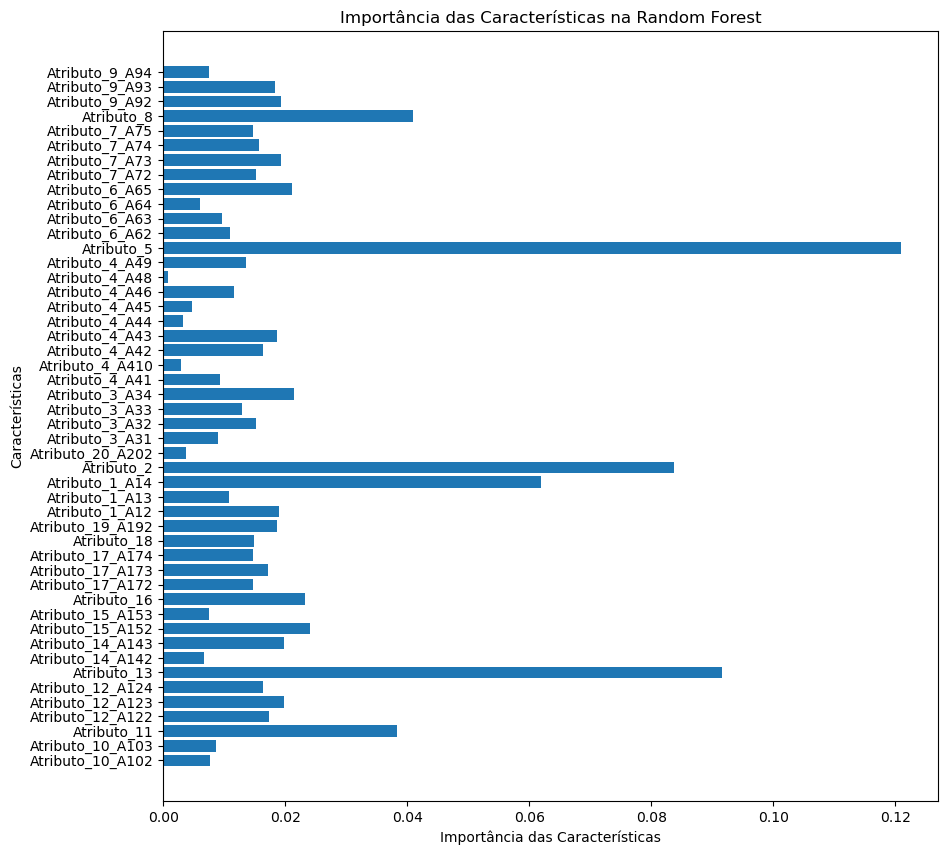

In [27]:
# Associando as características aos nomes das características
nomes_caracteristicas = X_train.columns 

# Crie um gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(nomes_caracteristicas, importancias_features)
plt.xlabel("Importância das Características")
plt.ylabel("Características")
plt.title("Importância das Características na Random Forest")
plt.show()

MLP Classifier 

In [28]:
# aplicação do MLP classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
clf3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

In [29]:
# medição do desempenho do modelo
acuracia3 = accuracy_score(y_test, y_pred3)
precisao3 = precision_score(y_test, y_pred3)
revocacao3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred2)
matriz_confusao_3 = confusion_matrix(y_test, y_pred3)

In [30]:
print(f'Acurácia: {acuracia3}')
print(f'Precisão: {precisao3}')
print(f'Revocação: {revocacao3}')
print(f'F1-score: {f1_3}')
print('Matriz de Confusão:')
print(matriz_confusao_3)

Acurácia: 0.5466666666666666
Precisão: 0.773109243697479
Revocação: 0.4577114427860697
F1-score: 0.8271334792122539
Matriz de Confusão:
[[ 92 109]
 [ 27  72]]


### Avaliação dos Resultados

<div style="text-align: justify">Como podemos observar nas análise acima realizadas, o modelo MLP Classifier possui as piores métricas de desempenho. Se considerarmos também que ele é o que possui a pior interpretabilidades dos 3 modelos utilizados, poderíamos então descartá-lo para fazermos predições com base no dataset proposto. 
Os outros dois modelos possuem resultados semelhantes, exceto para a revocação, no Random Forest atingiu o valor de 0,94, contra 0,85 na Regressão Logistica. Caso a opção seja minimizar os falsos negativos, o Random Forest pode ser uma boa opção com base nos testes realizados até aqui.</div>
